# Support Vector Machines (SVM) with Sklearn

This notebook creates and measures an [LinearSVC with Sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC). This has more flexibility in the choice of penalties and loss functions and should scale better to large numbers of samples compared to SVC.

* Method: LinearSVC
* Dataset: Iris

## Imports

In [ ]:
import numpy as np

from sklearn.datasets import load_iris
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

%matplotlib inline

## Load and Prepare the Data

In [ ]:
# Load the data
data = load_iris()

In [ ]:
# Show the information about the dataset
print(data.DESCR)

In [ ]:
# Split the data into labels (targets) and features
label_names = data['target_names']
labels = data['target']

feature_names = data['feature_names']
features = data['data']

# View the data
print(label_names)
print(labels[0])
print("")
print(feature_names)
print(features[0])

In [ ]:
# Create test and training sets
X_train, X_test, Y_train, Y_test = train_test_split(features,
                                                    labels,
                                                    test_size=0.33,
                                                    random_state=42)

## Fit a LinearSVC Model

Parameters
* C: tells the SVM optimization how much you want to avoid misclassifying each training example
  * If C is large: the hyperplane does a better job of getting all the training points classified correctly
  * If C is small: the optimizer will look for a larger-margin separating hyperplane even if that hyperplane misclassifies more points
* random_state: seed of the pseudo random number generator to use when shuffling the data

In [ ]:
# Create an instance of the GaussianNB classifier
model = LinearSVC(C=1.0, random_state=42)

# Train the model
model.fit(X_train, Y_train)
model

In [ ]:
# Show the intercepts
print("Intercepts: {}".format(model.intercept_))

## Create Predictions

In [ ]:
# Create predictions
predictions = model.predict(X_test)
print(predictions)

In [ ]:
# Create a plot to compare actual labels (Y_test) and the predicted labels (predictions)
fig = plt.figure(figsize=(20,10))
plt.scatter(Y_test, predictions)
plt.xlabel("Actual Label: $Y_i$")
plt.ylabel("Predicted Label: $\hat{Y}_i$")
plt.title("Actual vs. Predicted Label: $Y_i$ vs. $\hat{Y}_i$")
plt.show()

## Model Evaluation

### Accuracy

The accuracy score is either the fraction (default) or the count (normalize=False) of correct predictions.

In [ ]:
print("Accuracy Score: %.2f" % accuracy_score(Y_test, predictions))

### K-Fold Cross Validation

This estimates the accuracy of an SVM model by splitting the data, fitting a model and computing the score 5 consecutive times. The result is a list of the scores from each consecutive run.

In [ ]:
# Get scores for 5 folds over the data
clf = LinearSVC(C=1.0, random_state=42)
scores = cross_val_score(clf, data.data, data.target, cv=5)
print(scores)

### Confusion Matrix

**Confusion Matrix for Binary Label**

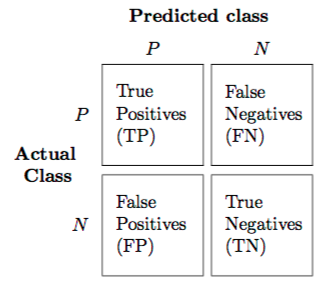

In [ ]:
# Plot the multi-label confusion matrix
print("Labels:")
for label in label_names:
    i, = np.where(label_names == label)
    print("{}: {}".format(i, label))

cm = confusion_matrix(y_target=Y_test, 
                      y_predicted=predictions, 
                      binary=False)

fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.title("Confusion Matrix")
plt.show()